## Artificial Neural Network
Context: this dataset is created for prediction of Graduate Admissions from an Indian perspective.
Content: the dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

Reference: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [ ]:
# Import Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) Download the dataset from this link https://www.kaggle.com/mohansacharya/graduate-admissions and put the csv file in the same directory as the current notebook.

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Admission_Predict_Ver1.1.csv']))


Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


### 2) Analyze the data
Print the first columns of the data set using pandas. Get a report using Pandas Profiling.

In [ ]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset)   #good one
profile.to_file("report.html")

TypeError: ignored

###3) Building X and y data
We call `X` the input composed of the following columns of the dataset: ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"] and `y` the output (target) composed of one column ["Chance of Admit "].
<b>Build X and y.</b><br>

**Hint:**
df[['A', 'Z']] : returns all the rows and only column A and Z.<br>
(You can also try slicing, for example df.iloc[:, 2:4])</i>

In [ ]:
X = dataset[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]
y = dataset[["Chance of Admit "]]

 X and y are DataFrames, to be used by numpy we have to transform them into arrays: transform X and y into arrays using ".values"

In [ ]:
X = X.values
y = y.values

### 4) Test-train split
Split data into training and testing datas, the training data is used to train the model, and the testing data is used to test: use the sklearn functionnality : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using the "print" function, display all the splitted data: X_train, X_test, y_train, y_test.

In [ ]:
print("X_train",X_train)
print("X_test",X_test)
print("y_train",y_train.T)
print("y_test",y_test.T)

X_train [[321.   111.     3.   ...   4.     8.83   1.  ]
 [316.   111.     4.   ...   5.     8.54   0.  ]
 [303.   102.     3.   ...   3.     8.5    0.  ]
 ...
 [302.    99.     1.   ...   2.     7.25   0.  ]
 [309.   105.     2.   ...   4.     7.68   0.  ]
 [314.   106.     2.   ...   3.5    8.25   0.  ]]
X_test [[334.   116.     4.     4.     3.5    9.54   1.  ]
 [314.   108.     4.     4.5    4.     9.04   1.  ]
 [315.   105.     2.     2.     2.5    7.65   0.  ]
 [312.   109.     3.     3.     3.     8.69   0.  ]
 [326.   112.     3.     3.5    3.     9.05   1.  ]
 [329.   111.     4.     4.5    4.     9.23   1.  ]
 [290.   100.     1.     1.5    2.     7.56   0.  ]
 [301.   106.     4.     2.5    3.     8.47   0.  ]
 [318.   109.     3.     3.5    4.     9.22   1.  ]
 [320.   112.     4.     3.     4.5    8.86   1.  ]
 [323.   108.     3.     3.5    3.     8.6    0.  ]
 [316.   109.     3.     3.5    3.     8.76   0.  ]
 [322.   103.     4.     3.     2.5    8.02   1.  ]
 [340.   

###  5) Feature scaling
####  Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html. 
#### <b>Question: </b>Is it useful or not to normalize your features? If so, normalize your data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

### 6) Make your first Simple Neural Network also known as Perceptron
The Network is initialized, since we want to construct a very simple Network: following this link https://keras.io/. We will construct hidden layer(In this case 2 hidden layers are sufficients). For documentation about creating  a sequential model please see the tutorial in this link  Compile the model using: model.compile()

In [ ]:
# Import Librairies
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf



In [ ]:
# 9-Building a model
def build_model():
  model = keras.Sequential([
    layers.Dense(14, activation= 'relu', input_dim=7),
    layers.Dense(14, activation= 'sigmoid'),
    tf.keras.layers.Softmax(axis=-1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['accuracy', 'mse'])
  return model


model1 = build_model()
#Initialization of Network

#defining layers
# First layer
# Second layer
# Compile the model


### 7) Fit your trained model
A model that is well-fitted produces more accurate outcomes, a model that is overfitted matches the train data too closely (low train loss, but high test loss), and a model that is underfitted doesn’t match the train data closely enough (high train loss).

a) An epoch is an iteration over the entire x and y data provided

b) Batch size = Number of samples per gradient update. The higher the batch size, the more memory space you'll need.


In [ ]:
batch_size = 50
epochs = 30
fitting = model1.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=batch_size,epochs=epochs)

Epoch 1/30
8/8 [==============================] - 0s 20ms/step - loss: 0.4459 - accuracy: 0.0000e+00 - mse: 0.4459 - val_loss: 0.4309 - val_accuracy: 0.0000e+00 - val_mse: 0.4309
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.0000e+00 - mse: 0.4459 - val_loss: 0.4308 - val_accuracy: 0.0000e+00 - val_mse: 0.4308
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.0000e+00 - mse: 0.4458 - val_loss: 0.4308 - val_accuracy: 0.0000e+00 - val_mse: 0.4308
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.0000e+00 - mse: 0.4458 - val_loss: 0.4308 - val_accuracy: 0.0000e+00 - val_mse: 0.4308
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.0000e+00 - mse: 0.4458 - val_loss: 0.4308 - val_accuracy: 0.0000e+00 - val_mse: 0.4308
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.0000e+00 - mse: 0.

[]

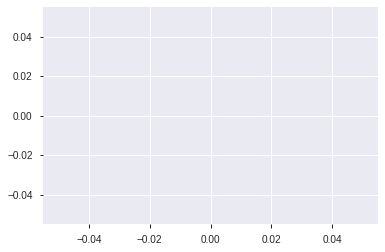

In [ ]:
%matplotlib inline
plt.plot()

### 8) Make a prediction for test data

In [ ]:
x = np.array([220,100,2,3.5,3,8,0],dtype = 'float32')
print(x)
x = x.reshape(-1, 7)
x = scaler.transform(x)
model1.predict(x)

[220.  100.    2.    3.5   3.    8.    0. ]


array([[0.05432913, 0.10702512, 0.05286033, 0.10193793, 0.05933245,
        0.06749596, 0.09837451, 0.06431349, 0.06093952, 0.05673836,
        0.05795191, 0.06251211, 0.10713977, 0.04904939]], dtype=float32)

### 9)Predict new student:
The student with the following informations will be admitted:

GRE Score: 220,   TOEFL Score: 100, University rating: 2,  SOP: 3.5, LOR: 3, CGPA: 8, Research: 0

In [ ]:
#model1.predict(220)

IndexError: ignored